# Doing Things with Text 3D: Basic textual statistics

This notebook introduces basic statistical analysis for multiple text documents after they have been preprocessed. 
You will learn to calculate metrics like word counts, lexical diversity, and visualize the most common words.

### Step 0: Install packages (only the first time)

In [1]:
!pip install wordcloud

### Step 1: Import Required Packages

In this notebook, we’ll use the following packages to perform our analysis:
- `pathlib.Path`: Provides an object-oriented interface for filesystem paths
- `nltk.tokenize`: For splitting text into individual words.
- `nltk.corpus.stopwords`: A collection of common words like 'the', 'and', 'is', which are often removed in analysis.
- `wordcloud`: Creates a word cloud visualization.
- `matplotlib.pyplot`: Allows for creating visualizations like charts and graphs to represent data visually.
- `collections.Counter`: A specialized dictionary that counts the occurrences of elements in an iterable.

In [2]:
# Import necessary libraries
from pathlib import Path
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

### Step 2: Define Input and Output Paths

Set your input and output directories. This setup allows the notebook to load the text file for analysis and save output images.
Make sure to replace 'path/to/your/folder' with the actual folder path containing your text document.

In [3]:
# Define input and output paths
indir = Path('/Users/huijn001/Nextcloud/data_lokaal/Bijbel/')
outdir = Path('/Users/huijn001/desktop/')
outdir.mkdir(parents=True, exist_ok=True)  # Create the output directory if it doesn't exist

dataset = 'Bijbel' # here the name of your actual dataset for output files

In [4]:
def save_dataset(dataset):
    dataset_out = dataset.replace(" ", "_").lower()
    return dataset_out

### Step 3: Load Your Text Document

Now, load the text document you want to analyze. Make sure the file is in the folder specified in the input path.

In [5]:
text = ""  # initialize empty master string

# Loop through all text files in the folder
for file in sorted(indir.glob("*.txt")):
    with open(file, encoding="utf8") as f:
        text += f.read() + "\n"
        
print(text[:400])  # Show a sample of the loaded text

NVT

Bijbel

Biblica vertaling



1988, NL

Bijbel.





Inhoudsopgave

Oude Testament

Genesis

1 · 2 · 3 · 4 · 5 · 6 · 7 · 8 · 9 · 10 · 11 · 12 · 13 · 14 · 15 · 16 · 17 · 18 · 19 · 20 · 21 · 22 · 23 · 24 · 25 · 26 · 27 · 28 · 29 · 30 · 31 · 32 · 33 · 34 · 35 · 36 · 37 · 38 · 39 · 40 · 41 · 42 · 43 · 44 · 45 · 46 · 47 · 48 · 49 · 50

Exodus

1 · 2 · 3 · 4 · 5 · 6 · 7 · 8 · 9 · 10 · 11 · 12 · 13 ·


#### Step 3b: Tokenization

In [6]:
tokens = word_tokenize(text)
print(tokens[:20])

['NVT', 'Bijbel', 'Biblica', 'vertaling', '1988', ',', 'NL', 'Bijbel', '.', 'Inhoudsopgave', 'Oude', 'Testament', 'Genesis', '1', '·', '2', '·', '3', '·', '4']


#### Step 3b (Optional): Define Custom Stop Words

You can define additional words to remove from your text. If you leave the list empty, no additional words will be removed.
This step is optional but can help refine your analysis if there are specific words you want to exclude.

In [7]:
def remove_custom_stopwords(tokens, custom_stopwords=None):
    """Remove custom stopwords from a list of tokens."""
    if custom_stopwords:
        return [word for word in tokens if word.lower() not in custom_stopwords]
    return tokens

custom_stopwords = [''] # add custom stopwords between '', separated by commas: 'word', 'word', 'word'

In [8]:
# Apply custom stop word removal (or leave text unchanged if list is empty)
tokens = remove_custom_stopwords(tokens, custom_stopwords)
print(tokens[:20])  # Display sample tokens

['NVT', 'Bijbel', 'Biblica', 'vertaling', '1988', ',', 'NL', 'Bijbel', '.', 'Inhoudsopgave', 'Oude', 'Testament', 'Genesis', '1', '·', '2', '·', '3', '·', '4']


#### Step 4: Calculate Basic Statistics

With our tokenized text, we can now calculate some basic statistics, such as the number of unique words (types)
and the total number of words (tokens).

word_counts_total below is a counter object that counts the frequency for each of the words in 'tokens'. It feeds the bar chart below. Words that need removed from the bar chart can be put in the custom stopword list custom_words above

In [9]:
# Count unique words
word_counts_total = Counter(tokens)

In [10]:
print("The total number of tokens in %s is: %s"%(dataset, len(tokens)))

The total number of tokens in Bijbel is: 5375975


In [11]:
print("The total number of types in %s is: %s" %(dataset, len(word_counts_total)))

The total number of types in Bijbel is: 65342


**Calculate lexical diversity by dividing number of types by number of tokens (= type token ratio, or TTR)**

In [13]:
# Calculate lexical diversity
ttr = len(word_counts_total) / len(tokens)
print(f"The type token ratio of {dataset} is: {ttr:.2%}")

The type token ratio of Bijbel is: 1.22%


### Step 5: Visualize Most Common Words in a bar chart

We'll plot the most common words in a bar chart and display them in a word cloud.
This gives insight into the most frequently occurring words in your text.

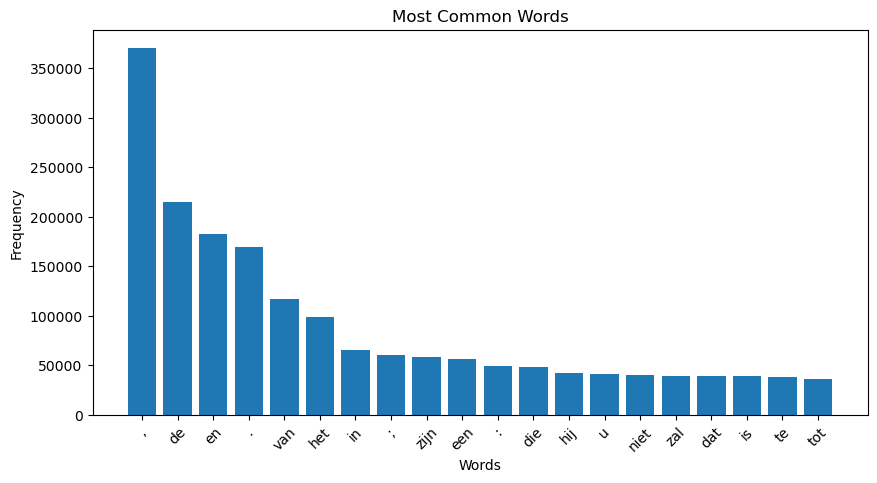

In [14]:
# Count the most common words
number_top_words = 20  # Set the number of most common words to display
most_common_words = word_counts_total.most_common(number_top_words)

# Separate words and counts for plotting
words, counts = zip(*most_common_words)

# Plot bar chart
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Most Common Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.savefig(outdir / f'{save_dataset(dataset)}_most_common.png', dpi=200, bbox_inches='tight') # change filename as wished
plt.show()

### Step 6: Visualize Most Common Words in a Word Cloud

A word cloud visualizes word frequency, where the size of each word indicates its frequency. You can customize the background color and colormap of the word cloud.

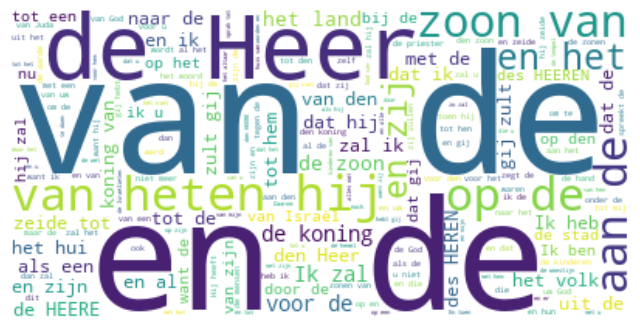

In [15]:
# Generate a word cloud
wordcloud = WordCloud(background_color='white', colormap='viridis').generate(text)

# Display the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig(outdir / f'{save_dataset(dataset)}_wordcloud.png', dpi=200, bbox_inches='tight') # change filename as wished
plt.show()

### Step 7: Visualize Word Frequency by Length

Next, we’ll analyze word frequency by word length to understand the distribution of different word lengths in your text.

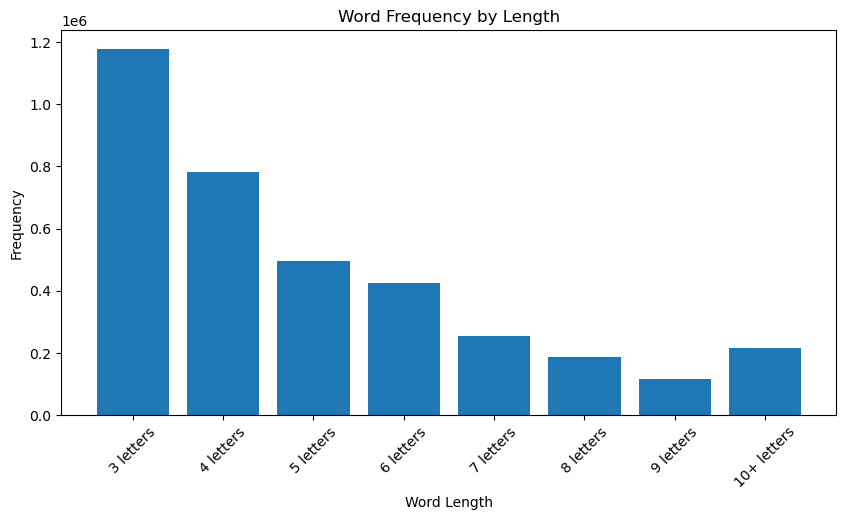

In [16]:
# Count words by length
word_lengths = {'3 letters': 0, 
                '4 letters': 0, 
                '5 letters': 0, 
                '6 letters': 0, 
                '7 letters': 0, 
                '8 letters': 0, 
                '9 letters': 0, 
                '10+ letters': 0}

for word in tokens:
    length = len(word)
    if length >= 3 and length <= 9:
        word_lengths[f"{length} letters"] += 1
    elif length >= 10:
        word_lengths["10+ letters"] += 1

# Plot word frequency by length
plt.figure(figsize=(10, 5))
plt.bar(word_lengths.keys(), word_lengths.values())
plt.title("Word Frequency by Length")
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.savefig(outdir / f'{save_dataset(dataset)}_word_length.png', dpi=200, bbox_inches='tight') # change filename as wished
plt.show()

### Step 8: Print Most Common Words by Word Length

For each word length category, you can examine the most common words. This can highlight patterns in the use of specific word lengths.

In [18]:
word_length = 6 # Define word length - can be any number
top_n = 15 # Number of top-frequency words - can be any number

# Define a function to get most common words by length
def most_common_words_by_length(tokens, word_length, top_n=top_n):
    words = [word for word in tokens if len(word) == word_length]
    word_counts = Counter(words)
    return word_counts.most_common(top_n)

most_common_n_letter_words = most_common_words_by_length(tokens, word_length)

print("Most common %s-letter words:\n" %(str(word_length)))
for word, frequency in most_common_n_letter_words:
    print('\'%s\': %s' %(word, frequency))

Most common 6-letter words:

'koning': 13446
'zullen': 12984
'worden': 11518
'hebben': 10783
'Israël': 6780
'mensen': 4760
'mannen': 4076
'zeggen': 3674
'plaats': 3579
'gelijk': 3498
'hadden': 3450
'andere': 3447
'jullie': 3292
'volken': 3220
'gedaan': 3149
